<a href="https://colab.research.google.com/github/jjuhyeok/Machine_Learning/blob/master/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_13%EC%A3%BC%EC%B0%A8_Cross_validation_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np #수학관련 라이브러리
import matplotlib.pyplot as plt #그래프 관련 라이브러리

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

X_train, X_test, y_train, y_test = train_test_split(
	iris_dataset['data'], iris_dataset['target'], test_size=0.2, random_state=22
    )#X_train, X_test에는 iris_dataset의 data가 들어가고 y_train, y_test에는 iris_dataset의 target이 들어감

In [2]:
print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
from sklearn.linear_model import LogisticRegression #분류를 위해
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# pipeline 정의
pipe_lr = Pipeline(steps=[('standardscaler',StandardScaler()),
                          ('logisticregression', LogisticRegression(random_state=22))])
#standardscaler를 통해 표준화를 시켜준다
#calss는 StandardScaler() 이다 standardscaler는 이름

print(pipe_lr)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=22))])


In [5]:
pipe_lr.fit(X_train, y_train)

# Accuracy score
print(f'Training accuracy: {pipe_lr.score(X_train, y_train)}')
print(f'Test accuracy: {pipe_lr.score(X_test, y_test)}')
#초모수는 아직까지 default값

Training accuracy: 0.95
Test accuracy: 0.9666666666666667


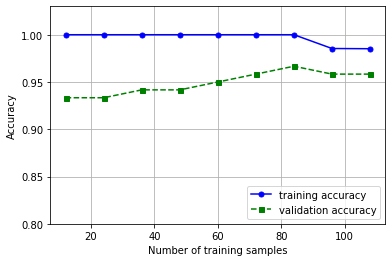

In [36]:
### Plot learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\ # \은 다음줄로 넘긴다는 의미
learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.01, 1, 10), cv=10)
#위에 두 줄 한줄로 합치면 이렇게 됨
#train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, train_sizes=np.linspace(0.01, 1, 10), cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,
         label='training accuracy')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s',
         markersize=5, label='validation accuracy')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.show()

In [11]:
#### K-fold cross-validation using pipeline ###
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10)  # Accuracy scores

#cross_val_score 쓰는 법
#첫번째는 모델, 두번째는 feature, 세번째는 target,cv는 분할 설정값, scoring은 평가방법
#score = cross_val_score(dt, iris.data, iris.target, cv=kfold, scoring="accuracy")

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [1.         0.91666667 1.         1.         0.91666667 1.
 0.91666667 0.91666667 0.91666667 1.        ]
CV accuracy: 0.958 +/- 0.042


In [18]:
### Grid search에 의한 초모수 결정 ###
from sklearn.model_selection import GridSearchCV
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'logisticregression__C': param_range}] #튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다
gs = GridSearchCV(estimator=pipe_lr, param_grid=param_grid, scoring='accuracy', cv=10) #그리드를 사용한 복수 하이퍼 파라미터 최적화
#estimator : classifier, regressor, pipeline 등 가능
#scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.
#cv : 교차 검증에서 몇개로 분할되는지 지정한다. 파이프 개수라고 생각하면 될듯
#refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.
#param_grid :  모든 파리미터 조합에 대한 성능 결과
#scoring 은 #  Classification일때  'accuracy','f1' #  Regression 일때 'neg_mean_squared_error','r2'...


#GridSearchCV 클래스는 validation_curve 함수와 달리 모형 래퍼(Wrapper) 성격의 클래스이다. 
#클래스 객체에 fit 메서드를 호출하면 grid search를 사용하여 자동으로 복수개의 내부 모형을 생성하고 
#이를 모두 실행시켜서 최적 파라미터를 찾아준다 
#즉, 1. 최적의 파라미터를 찾아주고, 2. 교차검증도 해준다!

gs = gs.fit(X_train, y_train)
print(gs.best_score_) #cross validation을 통해 구한 제일 높은 스코어
print(gs.best_params_)# grid_range 중에서 가장 좋은거

0.9666666666666666
{'logisticregression__C': 10.0}


In [37]:
bestlr = gs.best_estimator_
#best_estimator_ : 최고 점수를 낸 파라미터를 가진 모형
bestlr.fit(X_train, y_train)
print(bestlr.score(X_train,y_train))
#.score은 싸이킷런 함수
bestlr.score(X_test, y_test)

0.975


1.0

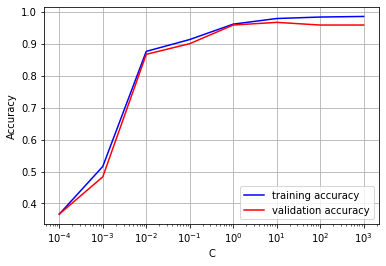

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
total_error = np.zeros(len(param_range)) #zeros : 모든 값이 0인 배열 생성
val_error = np.zeros(len(param_range))
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=22))
for idx in range(len(param_range)):
  pipe_lr.set_params(logisticregression__C=param_range[idx]) #Logistic이 아닌 logistic임 왜냐면 내가 이름을 위에서 logistic으로 설정
  result = cross_validate(estimator=pipe_lr, X=X_train, y=y_train, cv=10,
                          return_train_score=True)
  total_error[idx] = np.mean(result['train_score'])
  val_error[idx] = np.mean(result['test_score'])

plt.semilogx(param_range, total_error, color='blue', label='training accuracy')
plt.semilogx(param_range, val_error, color='red', label='validation accuracy')

plt.grid()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [21]:
#Nested cross-validation
from sklearn.svm import SVC
from sklearn.model_selection import KFold

X_iris = iris_dataset['data']
y_iris = iris_dataset['target']

# Number of random trials 
# 무작위 시도 횟수
NUM_TRIALS = 30

# Set up possible values of parameters to optimize over
# 최적화 할 매개 변수의 가능한 값을 설정
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}

# We will use a Support Vector Classifier with "rbf" kernel
# "rbf"커널과 함께 Support Vector Classifier를 사용할 것

svm = SVC(kernel="rbf")
#커널을 쓰는 이유는 직접적인 차원확장을 하지 않고 차원확장을 한 효과를 누리기 위해

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # 내부 및 외부 루프에 대한 교차 검증 기술을 선택
    # independently of the dataset.
    # 데이터 세트와 무관합니다.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    # 예 : "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut"등

    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    # n_splits 는 데이터 분할 수 입니다. 전체 데이터 수를 넘을 수 없습니다.
    # shuffle은  매번 데이터를 분할하기전 섞을지 말지 여부를 선택합니다.  

    #교차검증을 해도 모델의 성능이 직접적으로 향상되는 것이 아님
    #하지만 하이퍼 파라미터 튜닝을 통해 최적의 성능을 발휘하는 파라미터를 찾을 수 있다

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv) 
    #non_nested parameter와 관련된 clf는 왜 cv를 outer_cv로 설정하지?
    #inner를 아직 안해줘서 Non인건가?

    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    #Non_nested가 k-fold cross validation인가?

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv) #inner 에서는 test셋을 제외
    #nested parameter와 관련된 clf는 왜 cv를 outer_cv로 설정하지?
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

print(f'Nested CV accuracy: {nested_scores.mean()}')
print(f'Non-Nested CV accuracy: {non_nested_scores.mean()}')

Nested CV accuracy: 0.9660384068278804
Non-Nested CV accuracy: 0.9736190137505927


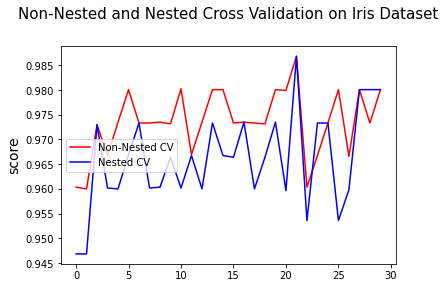

In [22]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.show()